In [1]:
require 'nn'
net = torch.load('ttt.t7')

In [2]:
-- load trainin images
byte_x = torch.load('cifar10/tr_data.bin'):double()
-- load trainin labels 
tr_y = torch.load('cifar10/tr_labels.bin'):double()+1

byte_x_flip = torch.DoubleTensor(50000,3,32,32)
for i=1,byte_x:size(1) do
    image.hflip(byte_x_flip[i], byte_x[i])
end

x1_mean = torch.mean(byte_x, 1)
x1_std = torch.std(byte_x, 1)

x2_mean = torch.mean(byte_x_flip, 1)
x2_std = torch.std(byte_x_flip, 1)

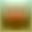

i = 1	
 121.0845
 -51.5147
 -42.7357
  64.4083
 -76.5736
  71.6187
-165.3226
  -2.3561
 114.1558
   2.1289
[torch.DoubleTensor of size 10]



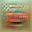

i = 2	
 113.0494
 118.1186
-143.5787
   8.9147
 -75.2628
  -9.6710
-198.9118
   2.5295
 112.6330
 112.2320
[torch.DoubleTensor of size 10]



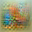

i = 3	
  93.8525
-158.8691
  97.0122
  82.7335
   9.4099
  93.0662
-132.3765
 -10.2927
  33.5439
 -86.9394
[torch.DoubleTensor of size 10]



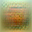

i = 4	
 102.3752
 -63.6594
 -29.8994
 107.2220
 -68.0889
 103.3519
-120.1333
 -26.4791
  97.7801
 -20.0624
[torch.DoubleTensor of size 10]



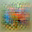

i = 5	
  82.2287
 -99.0520
   2.2851
  69.9129
  83.8037
  81.5083
-203.1726
  38.2582
  45.1174
 -53.5122
[torch.DoubleTensor of size 10]



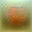

i = 6	
  96.6416
 -77.6613
 -28.9296
  86.2473
 -74.9497
 105.1645
-143.2441
 -12.9468
  98.9408
 -17.8109
[torch.DoubleTensor of size 10]



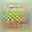

i = 7	
 112.7582
 -65.3849
 -21.9713
 110.8166
-109.5963
  81.1461
 118.4815
-134.0602
  81.2223
 -30.1405
[torch.DoubleTensor of size 10]



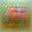

i = 8	
  84.7963
 -77.8445
 -67.4952
  53.5954
 -32.0905
  83.3644
-239.5283
  90.3594
  84.1678
  23.4495
[torch.DoubleTensor of size 10]



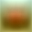

i = 9	
 112.3695
 -54.4095
 -45.3157
  64.9920
 -76.9232
  76.1528
-169.9381
  -3.4891
 119.0807
   0.3839
[torch.DoubleTensor of size 10]



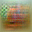

i = 10	
  81.6447
 -39.1076
 -96.5493
  47.0284
 -66.5395
  72.7965
-191.6836
  74.9796
  80.7925
  87.0052
[torch.DoubleTensor of size 10]



In [3]:
require 'image'

criterion = nn.CrossEntropyCriterion()
for i = 1, 10 do
    x_mean = (x1_mean[1] + x2_mean)/2
    for iteration = 1,1000 do
        prediction = net:forward(x_mean)
        criterion:forward(prediction, i)
        cri_grad = criterion:backward(prediction, i)
        x_mean = x_mean - net:backward(x_mean, cri_grad)
    end
    itorch.image(x_mean)
    prediction = net:forward(x_mean)
    print("i = " .. i)
    print(prediction)
end

Note that in the above output, for each value of i, the ith quantity in the array (of size 10) is the highest.